# Global Temperature Anomaly

SOURCES:
- IPCC (2018). "Special Report on Global Warming of 1.5°C"
- Paris Agreement (2015). UNFCCC
- IPCC. (2023). "AR6 Synthesis Report: Climate Change 2023"

DATA:
- Rohde, R. A. and Hausfather, Z.: The Berkeley Earth Land/Ocean Temperature Record, Earth Syst. Sci. Data, 12, 3469–3479, https://doi.org/10.5194/essd-12-3469-2020, 2020
- https://berkeleyearth.org/data/

Color zones:
- 0-1.0°C: Relatively safe (experienced so far)
- 1.0-1.5°C: Caution zone (Paris Agreement preferred limit)
- 1.5-2.0°C: Warning zone (Paris Agreement upper limit)
- 2.0-3.0°C: Danger zone (severe climate impacts)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge, Circle
from datetime import datetime
import matplotlib as mpl
mpl.rcParams['font.family'] = ['LCD']

# Load temperature data
temp_data = pd.read_csv('data/Land_and_Ocean_complete.txt',
                        comment='%', sep='\s+', header=None,
                        names=['year', 'month', 'anomaly_monthly', 'unc_monthly', 
                               'anomaly_annual', 'unc_annual', 'anomaly_5year', 'unc_5year', 
                               'anomaly_10year', 'unc_10year', 'anomaly_20year', 'unc_20year']
                        )

# Get current temperature anomaly
current_temp = temp_data['anomaly_monthly'].iloc[-1]
temp_data['date'] = pd.to_datetime(temp_data[['year', 'month']].assign(day=1))
current_date = temp_data['date'].iloc[-1] if 'date' in temp_data.columns else datetime.now().strftime('%Y-%m')

print(f"Current temperature anomaly: +{current_temp:.2f}°C")
print(f"Data as of: {current_date}")

<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
C:\Users\linas\AppData\Local\Temp\ipykernel_35604\1992157946.py:11: SyntaxWarning: invalid escape sequence '\s'
  comment='%', sep='\s+', header=None,


Current temperature anomaly: +1.14°C
Data as of: 2024-12-01 00:00:00


In [2]:
colors = {'green': '#2dc937',
          'light_green': '#99c140',
          'yellow': '#e7b416',
          'orange': '#db7b2b',
          'red': '#cc3232',
          'gray': '#666666',
          'white': '#cccccc',
          'black': '#000000'
          }

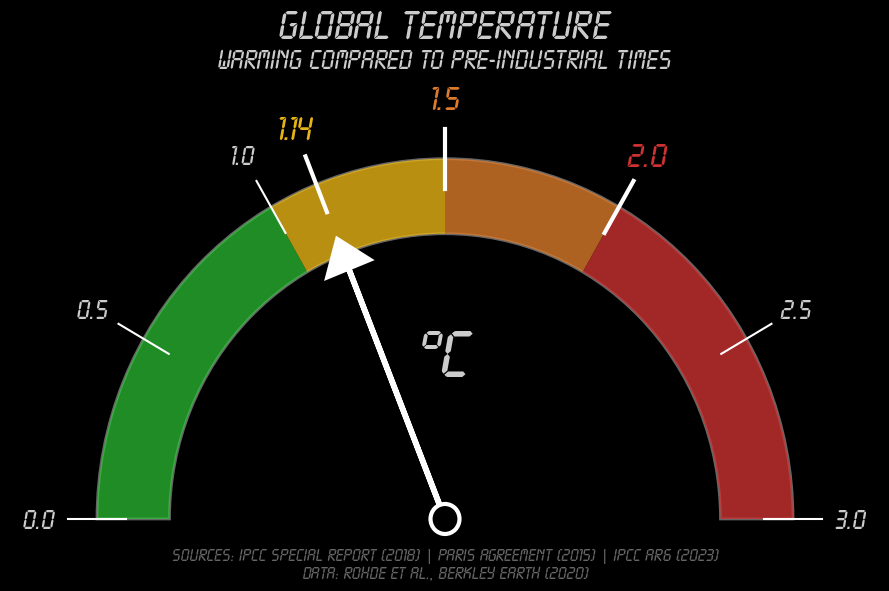

In [3]:
fig, ax = plt.subplots(figsize=(9, 6), facecolor=colors['black'])
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-0.1, 1.5)
ax.axis('off')
ax.set_facecolor(colors['black'])

# Half a circle
theta_start = 0    # Right side
theta_end = 180    # Left side

# Temperature range
temp_min = 0.0
temp_max = 3.0
temp_range = temp_max - temp_min

# Calculate angles for temperature thresholds
def temp_to_angle(temp_value):
    """Convert temperature to angle on gauge"""
    pct = (temp_value - temp_min) / temp_range
    return theta_end + pct * (theta_start - theta_end)

angle_1_0 = temp_to_angle(1.0)  # Experienced warming
angle_1_5 = temp_to_angle(1.5)  # Paris Agreement preferred target
angle_2_0 = temp_to_angle(2.0)  # Paris Agreement upper limit

# Background arc
bg_arc = Wedge((0, 0), 1.2, theta_start, theta_end, width=0.25,
               facecolor=colors['black'], edgecolor=colors['gray'], linewidth=2)
ax.add_patch(bg_arc)

# Green zone: 0-1.0°C
safe_arc = Wedge((0, 0), 1.2, angle_1_0, theta_end, width=0.25,
                 facecolor=colors['green'], edgecolor='none', alpha=0.7)
ax.add_patch(safe_arc)

# Yellow zone: 1.0-1.5°C
caution_arc = Wedge((0, 0), 1.2, angle_1_5, angle_1_0, width=0.25,
                    facecolor=colors['yellow'], edgecolor='none', alpha=0.8)
ax.add_patch(caution_arc)

# Orange zone: 1.5-2.0°C
warning_arc = Wedge((0, 0), 1.2, angle_2_0, angle_1_5, width=0.25,
                    facecolor=colors['orange'], edgecolor='none', alpha=0.8)
ax.add_patch(warning_arc)

# Red zone: 2.0-3.0°C
danger_arc = Wedge((0, 0), 1.2, theta_start, angle_2_0, width=0.25,
                   facecolor=colors['red'], edgecolor='none', alpha=0.8)
ax.add_patch(danger_arc)

# Add tick marks and labels
major_ticks = [1.5, 2.0]
tick_values = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
for temp_val in tick_values:
        angle = temp_to_angle(temp_val)
        angle_rad = np.radians(angle)
        
        # Label
        x_label = 1.4 * np.cos(angle_rad)
        y_label = 1.4 * np.sin(angle_rad)
        label_text = f'{temp_val:.1f}'
        label_color = colors['white']
        label_weight = 'normal'
        
        if temp_val in major_ticks:
                tick_outer = 1.3
                tick_inner = 1.1
                tick_lw = 3
                label_size = 25
        else:
                tick_outer = 1.28
                tick_inner = 1.12
                tick_lw = 1.5
                label_size = 20
                
        if temp_val == 1.5:
                label_color = colors['orange']
                label_weight = 'bold'
        elif temp_val == 2.0:
                label_color = colors['red']
                label_weight = 'bold'
        
        ax.text(
                x_label, y_label, label_text,
                ha='center', va='center',
                fontsize=label_size,
                color=label_color,
                fontweight=label_weight
        )
        # Tick mark
        x_outer = 1.3 * np.cos(angle_rad)
        y_outer = 1.3 * np.sin(angle_rad)
        x_inner = 1.1 * np.cos(angle_rad)
        y_inner = 1.1 * np.sin(angle_rad)
        ax.plot([x_inner, x_outer], [y_inner, y_outer], 
                color='white', linewidth=tick_lw)

# Needle pointing to current temperature
needle_angle = temp_to_angle(current_temp)
needle_rad = np.radians(needle_angle)
needle_x = 0.9 * np.cos(needle_rad)
needle_y = 0.9 * np.sin(needle_rad)

ax.arrow(0, 0, needle_x, needle_y, head_width=0.15, head_length=0.1,
         fc='white', ec='white', linewidth=4, zorder=2)

# Current temperature
x_outer = 1.3 * np.cos(needle_rad)
y_outer = 1.3 * np.sin(needle_rad)
x_inner = 1.1 * np.cos(needle_rad)
y_inner = 1.1 * np.sin(needle_rad)
x_label = 1.4 * np.cos(needle_rad)
y_label = 1.4 * np.sin(needle_rad)
ax.plot(
        [x_inner, x_outer], [y_inner, y_outer],
        color='white', linewidth=3
    )
ax.text(
        x_label, y_label, f'{current_temp:.2f}',
        ha='center', va='center',
        fontsize=25,
        color=colors['yellow'],
        fontweight='bold'
    )

# Center hub
center = Circle((0, 0), 0.05, facecolor=colors['black'], 
                edgecolor='white', linewidth=3, zorder=11)
ax.add_patch(center)

# Unit
ax.text(0, 0.55, '°C', fontsize=50,
        color=colors['white'], ha='center', va='center', fontweight='bold', zorder=1)

# Title
ax.text(0, 1.6, 'GLOBAL TEMPERATURE', fontsize=30,
        fontweight='bold', color=colors['white'], ha='center', va='bottom')
ax.text(0, 1.5, 'Warming compared to pre-industrial times', fontsize=20,
        color=colors['white'], ha='center', va='bottom', style='italic')

# Sources
ax.text(0, -0.1, '''Sources: IPCC Special Report (2018) | Paris Agreement (2015) | IPCC AR6 (2023)
Data: Rohde et al., Berkley Earth (2020)''', fontsize=13, color=colors['gray'],
        ha='center', va='top', multialignment='center')

plt.tight_layout()
plt.savefig('visualizations/temp_anomaly.svg',
            bbox_inches='tight', facecolor=colors['black'], edgecolor='none')
plt.show()